In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
simple_text = 'This isn\'t a real text, this is an example text... Notice this contains punctuation!!'

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-z0-9\']+')
tokenized_document = tokenizer.tokenize(simple_text)
print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
cleaned_tokens = []
for word in tokenized_document:
    word = word.lower()
    if word not in stop_words:
        cleaned_tokens.append(word)
        print(cleaned_tokens)

['real']
['real', 'text']
['real', 'text', 'example']
['real', 'text', 'example', 'text']
['real', 'text', 'example', 'text', 'notice']
['real', 'text', 'example', 'text', 'notice', 'contains']
['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti','sings', 'hopped','rocks','better','easily']
pos=['n','v','v','n','a','r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("Lemmatized words: ", lemmatized_words)
print("Stemmed words: ", stemmed_words)

Lemmatized words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [ ]:
stemmed_text= [stemmer.stem(word) for word in cleaned_tokens]
print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [ ]:
def preprocess_text(text):
 tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-z0-9\']+').tokenize(text)
 cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
 stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
 return stemmed_text

In [ ]:
hotels = pd.read_csv("/content/tourist_accommodation_reviews (1).csv",sep=",")

hotels.columns = ["ID","Review Date","Location","Hotel/Restaurant name","Review"]
hotels.head()



,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [ ]:
hotels_1 = hotels.loc[hotels['Location'].isin([' Rawai'])]
hotels_1.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
200,rn580748664,Reviewed 4 days ago,Rawai,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no..."
201,rn579783154,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,"I have been here a couple of times now,and hav..."
202,rn579651071,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...
203,rn574834726,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...
204,rn574713927,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,The reviews speak for themselves. This is main...


In [ ]:
hotels_1.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3811,3811,3811,3811,3811
unique,3471,1465,1,39,3471
top,rn485859329,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,I'm not use to do hard comments about the rest...
freq,6,36,3811,100,6


In [ ]:
## filtering out hotels
hotels_1 = hotels_1[~hotels_1['Hotel/Restaurant name'].isin(['Modena','Rum Jungle','Sala Mexicali','The Islander','The Breakfast Hut','Moo Resturant','Cafe Java','Delish Cafe','Mookdee Seafood'])]

In [ ]:
hotels_1.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3023,3023,3023,3023,3023
unique,2743,1286,1,31,2743
top,rn545164509,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,This was my second visit since the original ow...
freq,6,32,3023,100,6


In [ ]:
hotels_2 = hotels_1[["Hotel/Restaurant name", "Review"]]
hotels_2.head()

,Hotel/Restaurant name,Review
200,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no..."
201,Green Tamarind Kitchen,"I have been here a couple of times now,and hav..."
202,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...
203,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...
204,Green Tamarind Kitchen,The reviews speak for themselves. This is main...


In [ ]:
print("\n All Hotel Labels")
print(hotels_2.groupby("Hotel/Restaurant name").count())


 All Hotel Labels
                                                 Review
Hotel/Restaurant name                                  
A Spoonful of Sugar                                 100
Atsumi Raw Cafe                                     100
Bon Island Restaurant                                96
COCONUT Bar & Restaurant - Rawai Beach              100
Cashew Nuts Food                                    100
D Wine Italian Bistro & Wine Bar                    100
Divino Tapas Restaurant                              93
Flip Side                                           100
Green Tamarind Kitchen                              100
Hooters Phuket                                      100
Il Tagliere da Massimo                              100
Khun Pha                                             93
Kook Restaurant                                     100
Le Celtique                                          93
Lucky 13 Sandwich Rawai                             100
Mamasita Mexican             

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(hotels_2['Review'].map(''.join))
x = pd.DataFrame(x.toarray(),columns=vectorizer.get_feature_names_out())

x.head()


,00,0080,0082,0083,0084,0085,0087,0089,008a,008b,...,yum,yummiest,yummo,yummy,yums,zealand,zesty,zigeuner,zucchini,zuppa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

y = hotels_2['Hotel/Restaurant name']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, train_size=0.8,test_size=0.2,random_state=99)

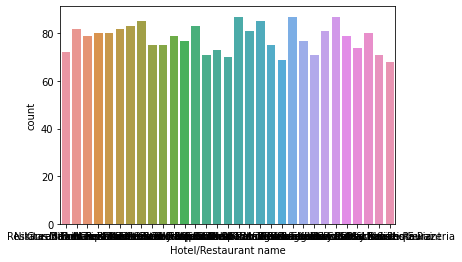

In [ ]:
sns.countplot(x=y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('------------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print (result)

accuracy:0.49


Confusion Matrix:
[[ 6  1  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0
   2  1  0  0  0  2  0]
 [ 4 10  1  1  2  1  0  0  0  0  0  0  0  0  1  1  2  0  0  0  5  1  0  0
   0  0  0  0  0  0  0]
 [ 0  0 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0
   0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0
   1  0  0  2  0  0  0]
 [ 0  0  0  1  7  0  0  0  0  0  0  1  1  0  0  0  1  0  0  1  1  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  3  0  1  0  0  0  3  0  1  0  0  0  0  0
   0  0  1  1  0  0  0]
 [ 0  0  0  1  0  1  8  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0
   0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0 10  3  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0
   0  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  1  2 12  0  1  0  0  0  0  0  2  0  2  1  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  1  2  1  2  2  2  0  7  1  0  0  0  0  1  0  0  0  0  0  1  0  0
   0  0  0

In [ ]:
print(preprocess_text('This hotel is great!'))
print(preprocess_text('This hotel is not great'))

['hotel', 'great']
['hotel', 'great']


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This hotel is great'))
print(sentiment.polarity_scores('This hotel is not great'))

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [ ]:
# read in the review data - this will be used for our analysis

hotel_reviews = pd.read_csv('/content/tourist_accommodation_reviews (1).csv', encoding_errors='ignore')

hotel_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [ ]:
hotel_reviews.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [ ]:
hotel_reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [ ]:
hotel_reviews_1 = hotel_reviews.loc[hotel_reviews['Location'].isin([' Rawai'])]
hotel_reviews_1.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
200,rn580748664,Reviewed 4 days ago,Rawai,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no..."
201,rn579783154,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,"I have been here a couple of times now,and hav..."
202,rn579651071,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...
203,rn574834726,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...
204,rn574713927,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,The reviews speak for themselves. This is main...


In [ ]:
hotels_reviews_1 = hotels_reviews_1[~hotels_1['Hotel/Restaurant name'].isin(['Modena','Rum Jungle','Sala Mexicali','The Islander','The Breakfast Hut','Moo Resturant','Cafe Java','Delish Cafe','Mookdee Seafood'])]

In [ ]:
hotels_reviews_1.describe()

In [ ]:
hotel_reviews_1['compound'] = [sentiment.polarity_scores(review)['compound'] for review in hotel_reviews_1['Review']]
hotel_reviews_1['neg'] = [sentiment.polarity_scores(review)['neg'] for review in hotel_reviews_1['Review']]
hotel_reviews_1['neu'] = [sentiment.polarity_scores(review)['neu'] for review in hotel_reviews_1['Review']]
hotel_reviews_1['pos'] = [sentiment.polarity_scores(review)['pos'] for review in hotel_reviews_1['Review']]
hotel_reviews_1.head()

<ipython-input-86-dafa4251af62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_reviews_1['compound'] = [sentiment.polarity_scores(review)['compound'] for review in hotel_reviews_1['Review']]
<ipython-input-86-dafa4251af62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_reviews_1['neg'] = [sentiment.polarity_scores(review)['neg'] for review in hotel_reviews_1['Review']]
<ipython-input-86-dafa4251af62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
200,rn580748664,Reviewed 4 days ago,Rawai,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no...",0.9381,0.040,0.656,0.304
201,rn579783154,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,"I have been here a couple of times now,and hav...",0.0000,0.000,1.000,0.000
202,rn579651071,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...,0.8800,0.000,0.596,0.404
203,rn574834726,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...,0.6908,0.000,0.832,0.168
204,rn574713927,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,The reviews speak for themselves. This is main...,-0.1280,0.058,0.896,0.047


In [ ]:
hotel_reviews_1[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3811.000000,3811.000000,3811.000000,3811.000000
mean,0.677645,0.027109,0.728295,0.244597
std,0.410436,0.049453,0.128252,0.136953
min,-0.966200,0.000000,0.297000,0.000000
25%,0.624900,0.000000,0.644000,0.144000
50%,0.858800,0.000000,0.735000,0.239000
75%,0.930800,0.043000,0.820500,0.337000
max,0.990700,0.423000,1.000000,0.703000


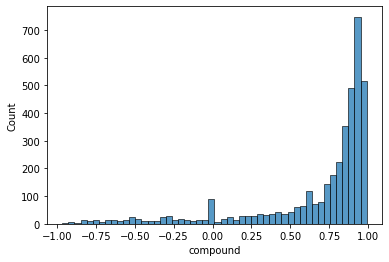

In [ ]:
sns.histplot(hotel_reviews_1['compound'])

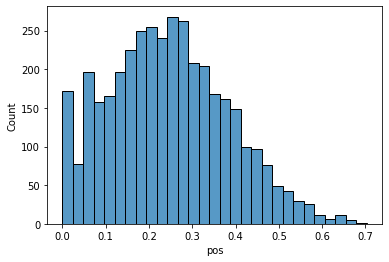

In [ ]:
sns.histplot(hotel_reviews_1['pos'])

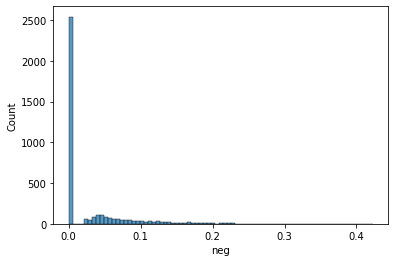

In [ ]:
sns.histplot(hotel_reviews_1['neg'])

In [ ]:
(hotel_reviews_1['compound']<=0).groupby(hotel_reviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
A Spoonful of Sugar                                 4
Atsumi Raw Cafe                                     6
Bon Island Restaurant                              11
COCONUT Bar & Restaurant - Rawai Beach              9
Cafe Java                                          15
Cashew Nuts Food                                   11
D Wine Italian Bistro & Wine Bar                   18
Delish Cafe                                         6
Divino Tapas Restaurant                             8
Flip Side                                          10
Green Tamarind Kitchen                             10
Hooters Phuket                                     11
Il Tagliere da Massimo                             12
Khun Pha                                           18
Kook Restaurant                                     5
Le Celtique                                         9
Lucky 13 Sandwich Rawai                            16
Mamasita Mexican                                    9
Mando 

In [ ]:
#calculating percentage of total reviews
percent_negative = pd.DataFrame((hotel_reviews_1['compound']<-0).groupby(hotel_reviews_1['Hotel/Restaurant name']).sum()
                                /hotel_reviews_1['Hotel/Restaurant name'].groupby(hotel_reviews_1['Hotel/Restaurant name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
Hotel/Restaurant name,
Mando Restaurant & Steakhouse,2.000000
Atsumi Raw Cafe,3.000000
Phuket La Ca Sa,3.000000
The Islander,3.000000
A Spoonful of Sugar,4.000000
Rawai View Cafe' & Bar,4.000000
O-OH Farm Ta-Eiad,4.000000
Kook Restaurant,4.000000
Rum Jungle,5.000000


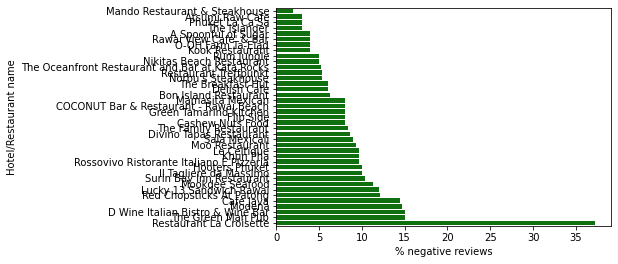

In [ ]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='g')

In [ ]:
hotel_reviews_1['processed_review'] = hotel_reviews_1['Review'].apply(preprocess_text)
reviews_positive_subset = hotel_reviews_1.loc[(hotel_reviews_1['Hotel/Restaurant name'] =='Hooters Phuket')
                                    & (hotel_reviews_1['compound']>0),:]
reviews_negative_subset = hotel_reviews_1.loc[(hotel_reviews_1['Hotel/Restaurant name'] =='Hooters Phuket')
                                    & (hotel_reviews_1['compound']<=0),:]
reviews_negative_subset.head(10)
                                

<ipython-input-93-827f66e55ca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_reviews_1['processed_review'] = hotel_reviews_1['Review'].apply(preprocess_text)


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
38245,rn578782533,Reviewed 1 week ago,Rawai,Hooters Phuket,My wife and I have been to at least 5 differen...,-0.4767,0.074,0.926,0.000,"[wife, least, 5, differ, hooter, us, one, whol..."
38247,rn577910861,Reviewed 2 weeks ago,Rawai,Hooters Phuket,Get real ! You never achive the real Hooters u...,-0.2595,0.084,0.860,0.056,"[get, real, never, achiv, real, hooter, unless..."
38250,rn575960082,Reviewed 3 weeks ago,Rawai,Hooters Phuket,As we were in Phuket thought we would try Hoot...,-0.7310,0.191,0.752,0.057,"[phuket, thought, would, tri, hooter, expens, ..."
38257,rn572560797,"Reviewed April 10, 2018",Rawai,Hooters Phuket,Visited this place last night . Friend had whi...,-0.3749,0.125,0.805,0.070,"[visit, place, last, night, friend, whiskey, c..."
38264,rn571388828,"Reviewed April 5, 2018",Rawai,Hooters Phuket,We were here on St Patrick's Day as we waited ...,-0.5719,0.099,0.901,0.000,"[st, patrick', day, wait, leav, 3am, flight, v..."
38275,rn565606506,"Reviewed March 10, 2018",Rawai,Hooters Phuket,"We had some wings which were quite ok, just li...",-0.9083,0.234,0.701,0.065,"[wing, quit, ok, like, usa, servic, someth, el..."
38283,rn560652226,"Reviewed February 15, 2018",Rawai,Hooters Phuket,We had lunch here while out sight-seeing and t...,-0.5106,0.116,0.835,0.049,"[lunch, sight, see, servic, aw, slow, typic, t..."
38296,rn555719584,"Reviewed January 22, 2018",Rawai,Hooters Phuket,We got some appetizers and some drinks but we ...,0.0000,0.000,1.000,0.000,"[got, appet, drink, spent, quit, lot, know, co..."
38299,rn554526160,"Reviewed January 17, 2018",Rawai,Hooters Phuket,Been to many hooters around the world and I mu...,-0.4019,0.085,0.866,0.049,"[mani, hooter, around, world, must, say, certa..."
38301,rn553723428,"Reviewed January 14, 2018",Rawai,Hooters Phuket,Girls were friendly enough but the terrace out...,-0.8403,0.215,0.699,0.086,"[girl, friendli, enough, terrac, outsid, liter..."


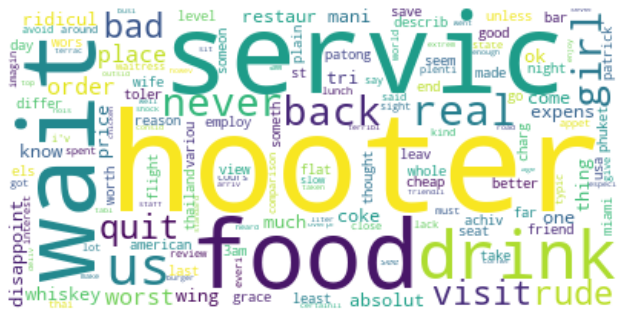

In [ ]:
import wordcloud


neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(11,11)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

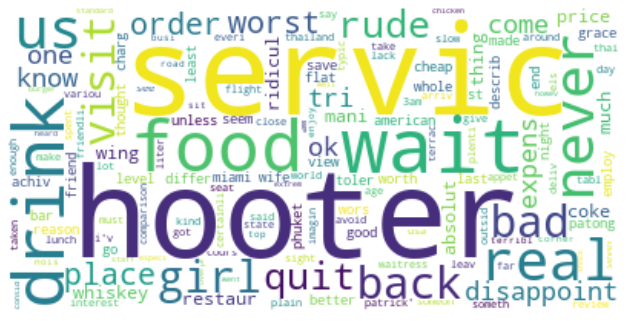

In [ ]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

# Displaying the generated image:
plt.figure(figsize=(11,11)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

  food   good servic hooter  great  staff  drink  place      u   nice 
    55     49     46     43     41     23     22     19     19     18 


In [ ]:
from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

hooter servic   wait   food  drink     us   real  never   girl   back 
     7      7      6      5      5      3      3      3      3      3 


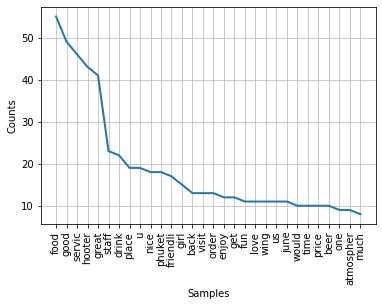

In [ ]:
pos_freqdist.plot(30)

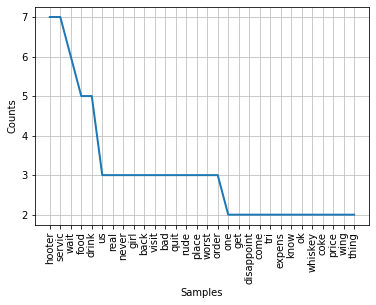

In [ ]:
neg_freqdist.plot(30)